In [2]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df_original = pd.read_csv("../Datasets/subset.csv")
df = df_original.copy()

/Users/felix/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (2,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Exploration

In [3]:
df.describe()

,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,is_certified,latitude,listing_id,longitude,mileage,owner_count,price,savings_amount,seller_rating,sp_id,vehicle_damage_category,year
count,836360.000000,0.0,999552.000000,947862.000000,836360.000000,947862.000000,0.0,999552.00000,9.995520e+05,999552.000000,9.489470e+05,504932.000000,9.995520e+05,999552.000000,988967.000000,999474.000000,0.0,999552.000000
mean,22.397219,NaN,77.905004,2885.819138,29.136044,243.205702,NaN,40.41676,2.752843e+08,-78.736810,3.149619e+04,1.498808,2.946136e+04,545.089520,4.257899,231677.194656,NaN,2017.583688
std,7.840201,NaN,110.213147,1280.351885,7.072744,87.291354,NaN,2.29126,8.983087e+06,5.526234,4.472165e+04,0.871119,1.906267e+04,1061.713621,0.519214,130347.113703,NaN,4.170237
min,7.000000,NaN,0.000000,700.000000,10.000000,65.000000,NaN,18.34670,2.049812e+07,-157.928000,0.000000e+00,1.000000,2.490000e+02,0.000000,1.000000,41593.000000,NaN,1915.000000
25%,18.000000,NaN,14.000000,2000.000000,25.000000,174.000000,NaN,39.30130,2.743873e+08,-82.599800,5.000000e+00,1.000000,1.800000e+04,0.000000,4.000000,63344.000000,NaN,2017.000000
50%,21.000000,NaN,35.000000,2500.000000,28.000000,240.000000,NaN,40.83250,2.784847e+08,-77.492000,1.097200e+04,1.000000,2.657000e+04,0.000000,4.333333,280865.000000,NaN,2019.000000
75%,26.000000,NaN,83.000000,3500.000000,33.000000,295.000000,NaN,42.05240,2.803926e+08,-74.295600,4.491750e+04,2.000000,3.750900e+04,783.000000,4.600000,334383.000000,NaN,2020.000000
max,127.000000,NaN,3573.000000,8400.000000,127.000000,1001.000000,NaN,61.20310,2.817657e+08,-66.078500,4.290461e+06,19.000000,3.195000e+06,142738.000000,5.000000,440951.000000,NaN,2021.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999552 entries, 0 to 999551
Data columns (total 66 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   vin                      999552 non-null  object 
 1   back_legroom             951418 non-null  object 
 2   bed                      6448 non-null    object 
 3   bed_height               122575 non-null  object 
 4   bed_length               122575 non-null  object 
 5   body_type                995183 non-null  object 
 6   cabin                    19386 non-null   object 
 7   city                     999552 non-null  object 
 8   city_fuel_economy        836360 non-null  float64
 9   combine_fuel_economy     0 non-null       float64
 10  daysonmarket             999552 non-null  int64  
 11  dealer_zip               999552 non-null  object 
 12  description              974069 non-null  object 
 13  engine_cylinders         970393 non-null  object 
 14  engi

### Plan cleaning steps

In [117]:
EXPLORATION_PHASE = False 


if EXPLORATION_PHASE:
    ## bed
    # df['bed'].unique() # remove this column, because most are nan
    # df.drop(['bed'], axis=1, inplace=True) # only 5764 values are not nan

    # ## bed_height
    # df['bed_height'].unique()
    # df.drop(['bed_height'], axis=1, inplace=True)

    ## bed_length, back_legroom
    def remove_unit(x):
        if (isinstance(x, str)):
            number = x.replace(' in', '')
            number = number.replace(' gal', '')
            number = number.replace(' seats', '')
            return float(number)
        else:
            return x

    def inches_to_floats(cols, df):
        for col in cols:
            df = df[df[col] != '--']
            df[col] = df[col].apply(lambda x: remove_unit(x))
            df = df[df[col].notna()]
            # df = df[df[col] != 0] # not sure about this

        return df

    cols = ['back_legroom', 'bed_length', 'front_legroom', 'fuel_tank_volume', 'height', 'length', 'maximum_seating']
    df = inches_to_floats(cols, df)

    ## body_type # this is fine

    ## cabin
    df = df[df['cabin'].notna()]

    ## city
    len(df['city'].unique()) # 1299 maybe this is too much

    ## city_fuel_economy
    df = df[df['city_fuel_economy'].notna()]

    ## combine_fuel_economy
    df = df[df['combine_fuel_economy'].notna()]

    ## daysonmarket # this is fine

    ## dealer_zip  # many different values, maybe omit

    ## description 800.000 unique -> drop
    df.drop(['description'], axis=1, inplace=True)

    ## engine_cylinders 1hencode

    ## engine_displacement
    df = df[df['engine_displacement'].notna()]

    ## engine_type 1hencode

    ## exterior_color # 15219 unique values -> drop?

    ## fleet 463017 nan -> drop/replace with false?

    ## frame_damaged 463017 nan -> replace with false

    ## franchise_dealer - fine
    ## franchise_make -> fine
    ## front_legroom -> cast to float
    ## fuel_tank_volume -> cast to float

    ## fuel_type
    df = df[df['fuel_type'].notna()]

    ## has_accidents -> replace nan with false

    ## height -> cast to float

    ## highway_fuel_economy - nans: 163192
    df = df[df['highway_fuel_economy'].notna()]

    ## horsepower
    df = df[df['horsepower'].notna()]

    ## interior_color 20.000 different cats -> drop?

    ## isCab	is_certified	is_cpo	is_new	is_oemcpo -> replace nan with false

    ## latitude, longitude -> fine

    ## length -> cast to float

    ## listed_date	 ? to timestamp?

    ## listing_color - 1h encode

    ## listing_id, main_picture_url, sp_id -> drop

    ## major_options --> remove? 119300 unique

    ## make_name -> 1hE, 80 unique

    ## maximum_seating - cast to float

    ## milage
    df = df[df['milage'].notna()]

    ## model_name - uniqe - 1248 - remove?

    ## owner_count -> replace nan by 1 or 0

    ## power -- ?

    ## salvage - replace nan by false

    ## savings_amount - fine

    ## vehicle_damage_category	 replace nan by new cat?

    ## year - fine

#     to_one_hot_encode = ['transmission_display', 'wheel_system_display', 'wheel_system	']
#     remove_rows_with_nan_for_col = ['seller_rating', 'transmission', 'wheel_system']
#     drop_because_too_many_unique = ['sp_name', 'trimId', 'trim_name']
#     replace_nan_by_false = ['theft_title']
#     drop_col_because_no_relevant_data = [
#         'vehicle_damage_category', 'vin'
#     ]
#     apply_numeric_transformation = [
#         'back_legroom', 'bed_length', 'front_legroom', 'fuel_tank_volume', 'height', 'length', 'maximum_seating'
#         'wheelbase', 'width'
#     ]



## grouped actions
drop_colmns = ['vin', 'bed', 'bed_height', 'city', 'combine_fuel_economy', 'dealer_zip', 'description',
              'listed_date', 'listing_id', 'main_picture_url', 'major_options', 'model_name', 'power',
              'sp_id', 'sp_name', 'torque', 'trimId', 'trim_name', 'vehicle_damage_category', 'is_certified']
convert_to_nr = ['back_legroom', 'bed_length', 'front_legroom', 'fuel_tank_volume', 'height', 'length',
                 'maximum_seating', 'wheelbase', 'width']
oneHE_and_drop_nan = ['body_type', 'engine_cylinders', 'engine_type', 'franchise_make', 'listing_color', 'make_name',
                     'cabin', 'transmission', 'transmission_display', 'wheel_system']
drop_rows_with_nan = ['price']
nan_to_mean = ['city_fuel_economy', 'engine_displacement', 'highway_fuel_economy', 'horsepower', 'mileage',
              'seller_rating', 'owner_count']
replace_nan_by_false = ['fleet', 'frame_damaged', 'fuel_type', 'has_accidents', 'isCab', 'is_cpo',
                       'is_new', 'is_oemcpo', 'salvage', 'theft_title']
no_action = ['daysonmarket', 'franchise_dealer', 'latitude', 'longitude', 'savings_amount', 'year']

## custom actions
# owner_count -> replace nan by 1

In [175]:
## Exploration tools
# df = df_original.copy()
# (sum(df['city_fuel_economy'].isna()))
# (df['year'].unique())
# (df['mileage'].unique())

### Data Cleaning

In [133]:
import numpy as np

df = df_original.copy()


## Delete all rows where price is NaN
df = df[df['price'].notna()]

## Drop all irrelevant columns
drop_colmns = ['vin', 'bed', 'bed_height', 'city', 'combine_fuel_economy', 'dealer_zip', 'description',
              'listed_date', 'listing_id', 'main_picture_url', 'major_options', 'model_name', 'power',
              'sp_id', 'sp_name', 'torque', 'trimId', 'trim_name', 'vehicle_damage_category', 'is_certified',
              'interior_color', 'exterior_color']
df = df.drop(drop_colmns, axis=1)

## Convert columns of number with units as string to floats
def remove_unit(x):
    if (isinstance(x, str)):
        if x == '--':
            return np.NaN
        number = x.replace(' in', '')
        number = number.replace(' gal', '')
        number = number.replace(' seats', '')
        return float(number)
    else:
        return x

def text_to_float(cols, df):
    for col in cols:
        df[col] = df[col].apply(lambda x: remove_unit(x))
        df[col] = df[col].fillna(df[col].mean())

    return df

convert_to_nr = ['back_legroom', 'bed_length', 'front_legroom', 'fuel_tank_volume', 'height', 'length',
                 'maximum_seating', 'wheelbase', 'width']
df = text_to_float(convert_to_nr, df)

## Replace NaN by False
replace_nan_by_false = ['fleet', 'frame_damaged', 'fuel_type', 'has_accidents', 'isCab', 'is_cpo',
                       'is_new', 'is_oemcpo', 'salvage', 'theft_title']
for col in replace_nan_by_false:
    df[col] = df[col].fillna(False)
    
## Replace NaN by mean
nan_to_mean = ['city_fuel_economy', 'engine_displacement', 'highway_fuel_economy', 'horsepower', 'mileage',
              'seller_rating', 'owner_count']
for col in nan_to_mean:
    df[col] = df[col].fillna(df[col].mean())

## Replace NaN by most occuring category
categories = ['body_type', 'engine_cylinders', 'engine_type', 'franchise_make', 'listing_color', 'make_name',
                     'cabin', 'transmission', 'transmission_display', 'wheel_system', 'wheel_system_display']
for col in categories:
    df[col] = df[col].fillna(df[col].mode().iloc[0])


In [142]:
print('Number of NaN values in dataset: ' + str(df.isnull().sum().sum())) ## Should be 0
nr_of_cols = len(df.columns.to_list())
print('Number of columns left in dataset: ' + str(nr_of_cols))

Number of NaN values in dataset: 0
Number of columns left in dataset: 44


### Training

In [171]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import time


def fit(X, y):
    
    START = time.time()
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=69)


    lr = DecisionTreeRegressor(random_state=0).fit(X, y)
    
    END = time.time()

    print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
    print("Validation set score: {:.7f}".format(lr.score(X_val, y_val)))
    print("Validation set MSE: ", mean_squared_error(y_val, lr.predict(X_val)))
    
    return (END - START)

In [172]:
y = df['price'].to_numpy()

to_plot_x = []
to_plot_y = []
for i in range(2, len(convert_to_nr)):
    X = df[convert_to_nr[1:i]].to_numpy()
    duration = fit(X, y)
    print('Duration: ' + str(duration) + ' seconds \n\n')
    
    to_plot_y.append(duration)
    to_plot_x.append(len(df[convert_to_nr[1:i]].columns.to_list()))
    

Training set score: 0.07
Validation set score: 0.0653682
Validation set MSE:  359369345.4472926
Duration: 0.22347021102905273 seconds 


Training set score: 0.25
Validation set score: 0.2301935
Validation set MSE:  295993431.73123455
Duration: 0.664607048034668 seconds 


Training set score: 0.62
Validation set score: 0.6270582
Validation set MSE:  143397498.36396906
Duration: 1.1531779766082764 seconds 


Training set score: 0.74
Validation set score: 0.8095464
Validation set MSE:  73230117.40533663
Duration: 1.636842966079712 seconds 


Training set score: 0.76
Validation set score: 0.8346675
Validation set MSE:  63570968.3164038
Duration: 2.001420021057129 seconds 


Training set score: 0.77
Validation set score: 0.8386502
Validation set MSE:  62039595.280190974
Duration: 2.1581461429595947 seconds 


Training set score: 0.77
Validation set score: 0.8410175
Validation set MSE:  61129344.07469911
Duration: 2.4569947719573975 seconds 




### Plot results

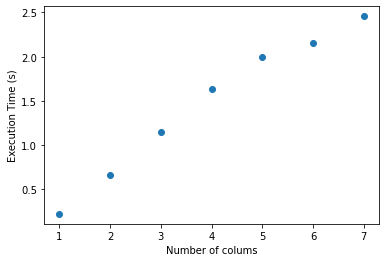

In [174]:
import matplotlib.pyplot as plt

plt.scatter(to_plot_x, to_plot_y)
plt.xlabel('Number of colums')
plt.ylabel('Execution Time (s)')

plt.show()

### 1hot-encode

In [ ]:
def one_hot_category(df, column_name):
    
    dummies = pd.get_dummies(df[column_name], column_name)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop([column_name], axis=1)
    
    return df
    
categories_to_encode = ['engine_cylinders', 'engine_type', 'franchise_make', 'listing_color', 'make_name']
for category in categories_to_encode:
    df = one_hot_category(df, category)